## 実験方法についてメモ

In [1]:
import os
import seaborn as sns
import sys
import pandas as pd
from hydra import compose, initialize
from omegaconf import DictConfig, ListConfig, OmegaConf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import mlflow
from pathlib import Path

import matplotlib.pyplot as plt

# モデルのモジュールのインポート
sys.path.append('../../')
sys.dont_write_bytecode = True
from src.train.lightGBM.model import Model
from src.base.MlflowClass import Environments

## 設定ファイルの読み込み

モデルの学習パラメータなどをyamlファイルから読み取り

In [2]:
# モデルの設定ファイルの読み込み
with initialize(version_base=None,config_path='../../config', job_name="test"):
    # dictinary形式での出力
    cfg = compose(config_name="train")

## データの読み込み

In [3]:
# データの抽出
df = sns.load_dataset('titanic')

# 説明変数の指定
X = pd.get_dummies(
    df.loc[:, (df.columns!='survived') & (df.columns!='alive')], 
    drop_first=True
    )
y = df['survived']

## 実験の開始

実験用のインスタンスの作成

In [4]:
experiment = Environments(
    DB_DIR_PATH="../../data/outputs"
    )

In [5]:
# 実験の開始
experiment.start_experiment(EXPERIMENT_NAME="COMMON")

New experiment started
Name: COMMON
Experiment_id: 0
Artifact Location: ../../data/outputs/0


## 実験管理

In [7]:
# 実験パラメータの記録
experiment.log_params_from_omegaconf_dict(cfg)

In [8]:
# モデルのインスタンス化
model = Model(params=OmegaConf.to_container(cfg['model']))

# 前処理
model.preprocessing(X, y)

# モデルの学習
model.train()

# 予測
y_pred = model.predict(X)

[1]	valid_0's rmse: 0.471899
[2]	valid_0's rmse: 0.456243
[3]	valid_0's rmse: 0.440677
[4]	valid_0's rmse: 0.428942
[5]	valid_0's rmse: 0.418356
[6]	valid_0's rmse: 0.410635
[7]	valid_0's rmse: 0.404415
[8]	valid_0's rmse: 0.399041
[9]	valid_0's rmse: 0.395104
[10]	valid_0's rmse: 0.391628
[11]	valid_0's rmse: 0.389041
[12]	valid_0's rmse: 0.386283
[13]	valid_0's rmse: 0.383856
[14]	valid_0's rmse: 0.382555
[15]	valid_0's rmse: 0.381615
[16]	valid_0's rmse: 0.38032
[17]	valid_0's rmse: 0.379248
[18]	valid_0's rmse: 0.379316
[19]	valid_0's rmse: 0.378649
[20]	valid_0's rmse: 0.377643
[21]	valid_0's rmse: 0.37709
[22]	valid_0's rmse: 0.376842
[23]	valid_0's rmse: 0.376426
[24]	valid_0's rmse: 0.376102
[25]	valid_0's rmse: 0.376378
[26]	valid_0's rmse: 0.376282
[27]	valid_0's rmse: 0.376182
[28]	valid_0's rmse: 0.376353
[29]	valid_0's rmse: 0.376215
[30]	valid_0's rmse: 0.375964
[31]	valid_0's rmse: 0.375726
[32]	valid_0's rmse: 0.375191
[33]	valid_0's rmse: 0.37519
[34]	valid_0's rmse: 0

In [9]:
# calc score
score = r2_score(y, y_pred)

# save log
experiment.log_metric('r2-score', score)

## アーティファクトの保存

In [10]:
experiment.log_text("thisistest", "testname.txt")

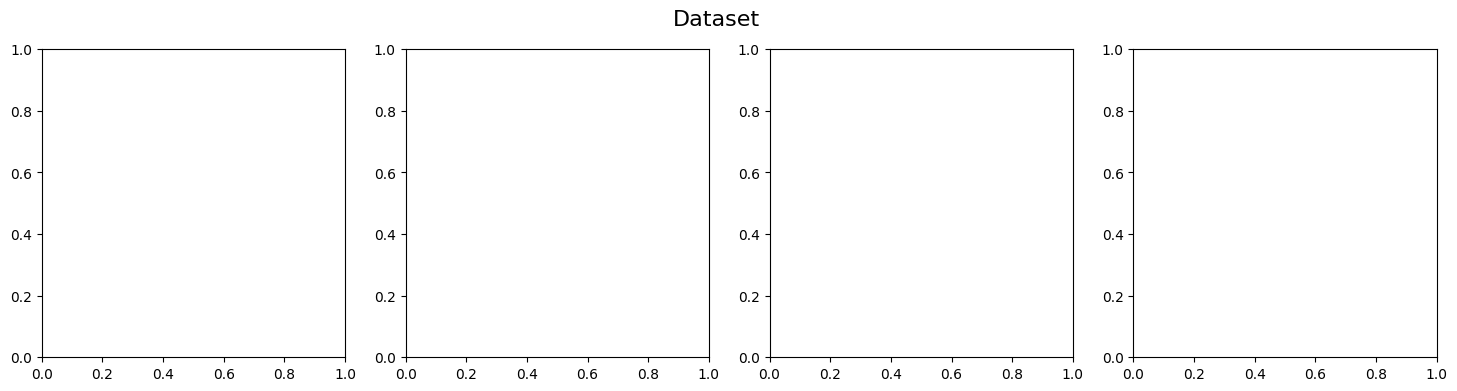

In [11]:
# グラフ用のfig, axesを作成
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# 次数を変えてスコアを評価
# グラフをArtifactとして保存
fig.suptitle('Dataset', size=16)
experiment.log_image(fig, 'test.png')

## 実験の完了

In [12]:
experiment.terminate_experiment()